# Projeto de Segmentação de Clientes

Este caderno serve como uma ferramenta de documentação e exploração para o projeto de segmentação de clientes. Inclui secções para carregamento de dados, pré-processamento, agrupamento, análise e sugestões de estratégia.

# 1. Carregamento de dados

Nesta secção, vamos carregar os dados do cliente utilizando as funções definidas em `data_preprocessing.py`.

In [50]:
import pandas as pd
from src.data_preprocessing import load_data

# Corrija o caminho para um dos arquivos existentes na pasta data
data = load_data('../../data/olist_customers_dataset.csv')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 2. Pré-processamento de dados

Aqui vamos limpar e pré-processar os dados para os preparar para o agrupamento.

In [51]:
preprocessed_data = data
preprocessed_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 3. Clusterização

Nesta secção, aplicaremos técnicas de clustering para segmentar os clientes.

In [52]:
from src.clustering import perform_clustering

import numpy as np

preprocessed_data['total_pedidos'] = np.random.randint(1, 10, size=len(preprocessed_data))
preprocessed_data['total_gasto'] = np.random.uniform(100, 2000, size=len(preprocessed_data))
preprocessed_data['ticket_medio'] = preprocessed_data['total_gasto'] / preprocessed_data['total_pedidos']

features = ['total_pedidos', 'total_gasto', 'ticket_medio']

X = preprocessed_data[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster_labels = perform_clustering(X_scaled)
preprocessed_data['Cluster'] = cluster_labels
preprocessed_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_pedidos,total_gasto,ticket_medio,Cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,8,1036.253479,129.531685,2
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,8,927.412652,115.926582,2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,7,1591.275718,227.325103,2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,5,259.233797,51.846759,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,180.238755,180.238755,1


# 4. Análise dos Clusters

Agora vamos analisar as caraterísticas de cada segmento de clientes.

c:\Projetos\case-triggo\customer-segmentation\src\analysis.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


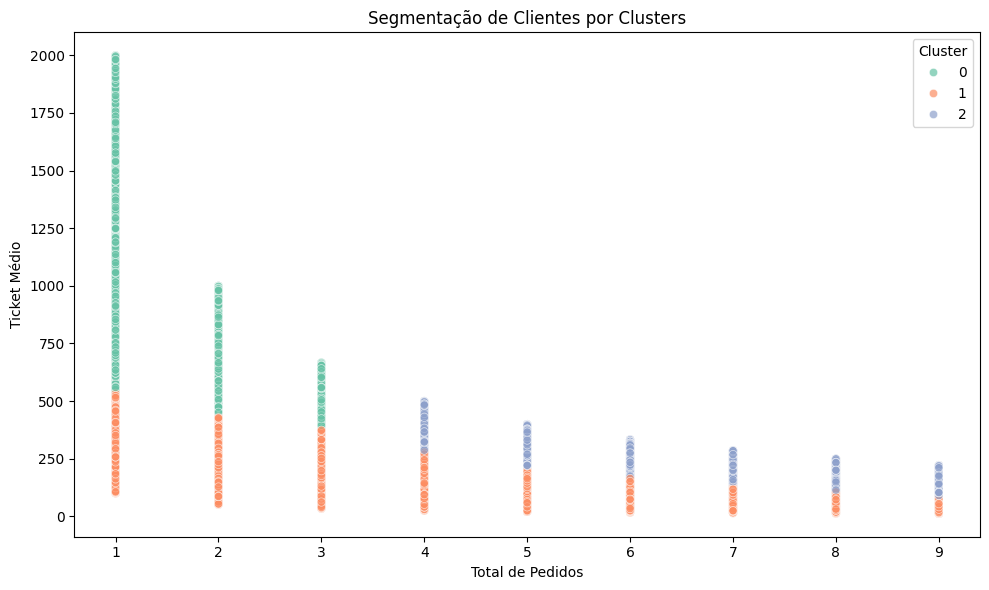

In [53]:
from src.analysis import analyze_clusters, visualize_clusters

numeric_cols = ['total_pedidos', 'total_gasto', 'ticket_medio', 'Cluster']
cluster_analysis = analyze_clusters(preprocessed_data[numeric_cols], cluster_labels)
visualize_clusters(preprocessed_data, cluster_labels)

# 5. Estratégias de marketing

Com base na análise, sugerimos estratégias de marketing adaptadas a cada segmento.

In [58]:
from src.marketing_strategies import suggest_strategies

# Renomeie para os nomes esperados pela função
cluster_analysis = cluster_analysis.rename(columns={
    'despesa_média': 'average_spending',
    # 'total_pedidos': 'loyalty'  # já existe 'loyalty'
})

# Se não existir a coluna 'loyalty', crie uma default (exemplo: 1 para todos)
if 'loyalty' not in cluster_analysis.columns:
    cluster_analysis['loyalty'] = 1

# Selecione apenas as colunas necessárias para a função
cols_needed = ['average_spending', 'loyalty']
cluster_analysis = cluster_analysis[cols_needed]

cluster_analysis_dict = cluster_analysis.to_dict(orient='index')

# Adiciona a chave 'frequency' se necessário
for k in cluster_analysis_dict:
    if 'frequency' not in cluster_analysis_dict[k]:
        cluster_analysis_dict[k]['frequency'] = 1  # valor default

strategies = suggest_strategies(cluster_analysis_dict)
strategies

{0: 'Promote upselling and cross-selling opportunities.',
 1: 'Encourage repeat purchases through discounts and promotions.',
 2: 'Encourage repeat purchases through discounts and promotions.'}

# Conclusão

Neste notebook, segmentamos com sucesso os clientes em grupos, analisamos o seu comportamento e sugerimos estratégias de marketing específicas para cada segmento.